## Sensor Fault Detection

### Problem Statement:

Heavy vehicles are widely used in industry to transport goods because they are economical and flexible. So as it is one of the primary types of vehicle for the transportation of goods, it costs a lot of money in case of a vehicle breakdown. A well-maintained vehicle is one of the keys to saving money and time.

One of the components that are critical to heavy vehicles is Air Pressure System (APS). It generates pressurized air with the help of an air compressor driven by the engine to be used for various components such as braking, gear changing, etc.

The task is to predict the probability of failure of the APS system based on the sensor data collected from the heavy vehicles. It helps reduce the maintenance cost and improve the efficiency of the vehicle. So the requirement is to minimize the false predictions.

### Cost-metric of miss-classification:


The total cost of a prediction model the sum of Cost_1 multiplied by the number of Instances with type 1 failure and Cost_2 with the number of instances with type 2 failure, resulting in a Total_cost. In this case Cost_1 refers to the cost that an unnessecary check needs to be done by an mechanic at an workshop, while Cost_2 refer to the cost of missing a faulty truck, which may cause a breakdown.

Total_cost = Cost_1 * No_Instances + Cost_2 * No_Instances

From the above problem statement we could observe that, we have to reduce false positives and false negatives. More importantly we have to reduce false negatives, since cost incurred due to false negative is 50 times higher than the false positives.


Dataset: https://archive.ics.uci.edu/ml/datasets/APS+Failure+at+Scania+Trucks

### Data Description:

The dataset contains 60000 instances of data collected from heavy Scania trucks in everyday usage. The dataset consists of both categorical and numerical features. The data is collected from 170 different sensors. The data is collected from a total of 21 different types of failure modes. The data is collected from a total of 6 different types of sensors.

### Data Dictionary:

The data dictionary is provided in the dataset itself. The data dictionary is provided in the form of an excel file. The data dictionary contains the following information:

- Column Name
- Unit of Measurement
- Sensor Location
- Sensor Type
- Min Value
- Max Value
- Normal Range
- Sensor Failure Mode

#### Objectives:
- To perform Exploratory Data Analysis on the dataset.
- To perform feature engineering on the dataset.
- To perform feature selection on the dataset.
- To perform model building on the dataset.
- To perform model tuning on the dataset.
- To perform model evaluation on the dataset.

### Challenges:
- The dataset is highly imbalanced.
- The dataset contains a lot of missing values.
- Misclassification leads to unecessary repair costs.



### Import the required libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from kneed import KneeLocator

# import the modesl
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, f1_score, precision_score, recall_score

import warnings
warnings.filterwarnings('ignore')

### Read Data

In [24]:
# load csv file
df = pd.read_csv('aps_failure_training_set.csv', na_values = 'na')
# test_set = pd.read_csv('aps_failure_test_set.csv', na_values = 'na')

In [25]:
# check the shape of the data
print(df.shape)

(60000, 171)


In [26]:
# check the first 5 rows of the data
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [27]:
# check unique values in each column
df.nunique()

class         2
aa_000    22095
ab_000       29
ac_000     2061
ad_000     1886
          ...  
ee_007    30469
ee_008    24213
ee_009     9724
ef_000       28
eg_000       49
Length: 171, dtype: int64

In [28]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print("There are {} numeric features in train data: {}".format(len(numeric_features), numeric_features))
print("\nThere are {} categorical features in train data: {}".format(len(categorical_features), categorical_features))

There are 170 numeric features in train data: ['aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'cc_000', 'cd_000', 'ce_000', 'cf_000', 'cg_000', 'ch_000', 'ci_000', 'cj_0

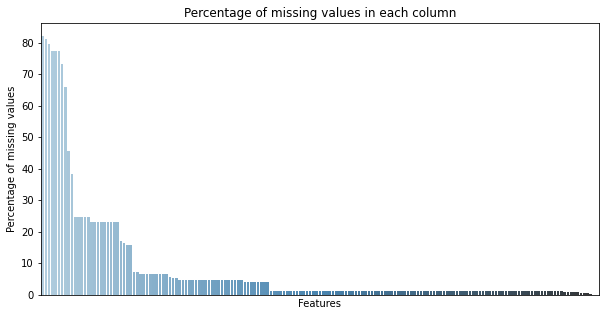

In [29]:
# check the number of missing values in each column
missing = df.isnull().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0, ascending=False)

# plot the missing values
plt.figure(figsize=(10, 5))
sns.barplot(x=missing.index, y=missing.values.T[0], palette='Blues_d')
plt.xticks([])
plt.xlabel('Features')
plt.ylabel('Percentage of missing values')
plt.title('Percentage of missing values in each column')
plt.show()

In [30]:
# drop the columns with more than 70% missing values
drop_columns = missing[missing[0] > 70].index
drop_columns

Index(['br_000', 'bq_000', 'bp_000', 'bo_000', 'ab_000', 'cr_000', 'bn_000'], dtype='object')

In [31]:
df.drop(list(drop_columns), axis=1, inplace=True)

In [8]:
# check the shape of dataset after dropping columns
df.shape

(60000, 164)

In [32]:
# check the percentage of missing values in each column
missing = df.isnull().sum()
total_cells = np.product(df.shape)
total_missing = missing.sum()
percent_missing = (total_missing/total_cells) * 100

print("The percentage of missing values in the dataset is: {}".format(percent_missing))

The percentage of missing values in the dataset is: 5.29765243902439


#### Visualization of unique values in Target variable

The percentage of positive class is 1.6666666666666667
The percentage of negative class is 98.33333333333333


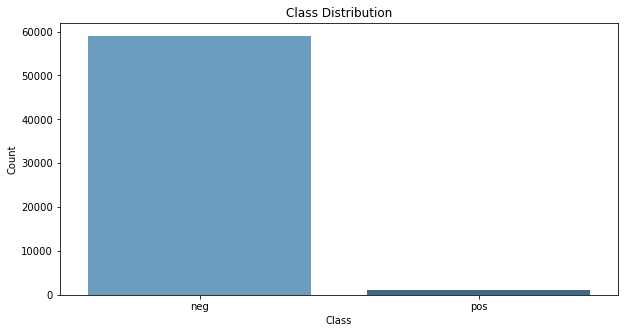

In [33]:
pos = (sum(df['class'] == 'pos')/len(df['class'].index))*100
neg = (sum(df['class'] == 'neg')/len(df['class'].index))*100

print('The percentage of positive class is', pos)
print('The percentage of negative class is', neg)

# plot the class distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='class', data=df, palette='Blues_d')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

##### Observation:
- The dataset is highly imbalanced.
- If we build a model with this dataset, it will be biased towards the majority class.
- We need to perform sampling techniques to balance the dataset.

#### Functions for model training and evaluation

In [12]:
# Performance metrics function
def performance_metrics(y_true, y_pred):
    """This function prints performance metrics for the model.

    Args:
        y_true : True class labels
        y_pred : Predicted class labels
    Returns:
        acc : Accuracy score
        f1 : F1 score
        precision : Precision score
        recall : Recall score
        roc_auc : ROC AUC score
    """
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_true, y_pred, average='weighted')
    return acc, f1, precision, recall, roc_auc

In [13]:
# Function for costs of the model as per the business problem
def cost(y_true, y_pred):
    """This function calculates the cost of the model.
    Args:
        y_true : True class labels
        y_pred : Predicted class labels
    Returns:
        cost : Cost of the model
    """
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    cost = 10*fp + 500*fn
    return cost

In [14]:
# Model evaluation function
def model_evaluation(all_models, X, y):
    """ This function evaluates the model performance.
    Args:
        all_model (list): list of models to be evaluated
        X (_type_): dataset without target label
        y (_type_): dataset with target label
    Returns:
        model_performance (DataFrame): DataFrame with model performance metrics
    """
    # split the dataset into train and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # create an empty DataFrame to store the model performance
    model_performance = pd.DataFrame(columns=['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall', 'ROC AUC', 'Cost'])

    # loop through the list of models
    for i in range(len(all_models)):
        # fit the model
        model = list(all_models.values())[i]
        model.fit(X_train, y_train)

        # predict the train and test set
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # calculate the performance metrics of train set
        acc, f1, precision, recall, roc_auc = performance_metrics(y_train, y_train_pred)
        cost_ = cost(y_train, y_train_pred)

        # calculate the performance metrics of test set
        acc_test, f1_test, precision_test, recall_test, roc_auc_test = performance_metrics(y_test, y_test_pred)
        cost_test = cost(y_test, y_test_pred)

        # store the performance metrics in the DataFrame
        model_performance.loc[i, 'Model'] = list(all_models.keys())[i]
        model_performance.loc[i, 'Accuracy'] = acc_test
        model_performance.loc[i, 'F1 Score'] = f1_test
        model_performance.loc[i, 'Precision'] = precision_test
        model_performance.loc[i, 'Recall'] = recall_test
        model_performance.loc[i, 'ROC AUC'] = roc_auc_test
        model_performance.loc[i, 'Cost'] = cost_test

    # sort the DataFrame based on cost
    model_performance.sort_values(by='Cost', inplace=True)

    return model_performance

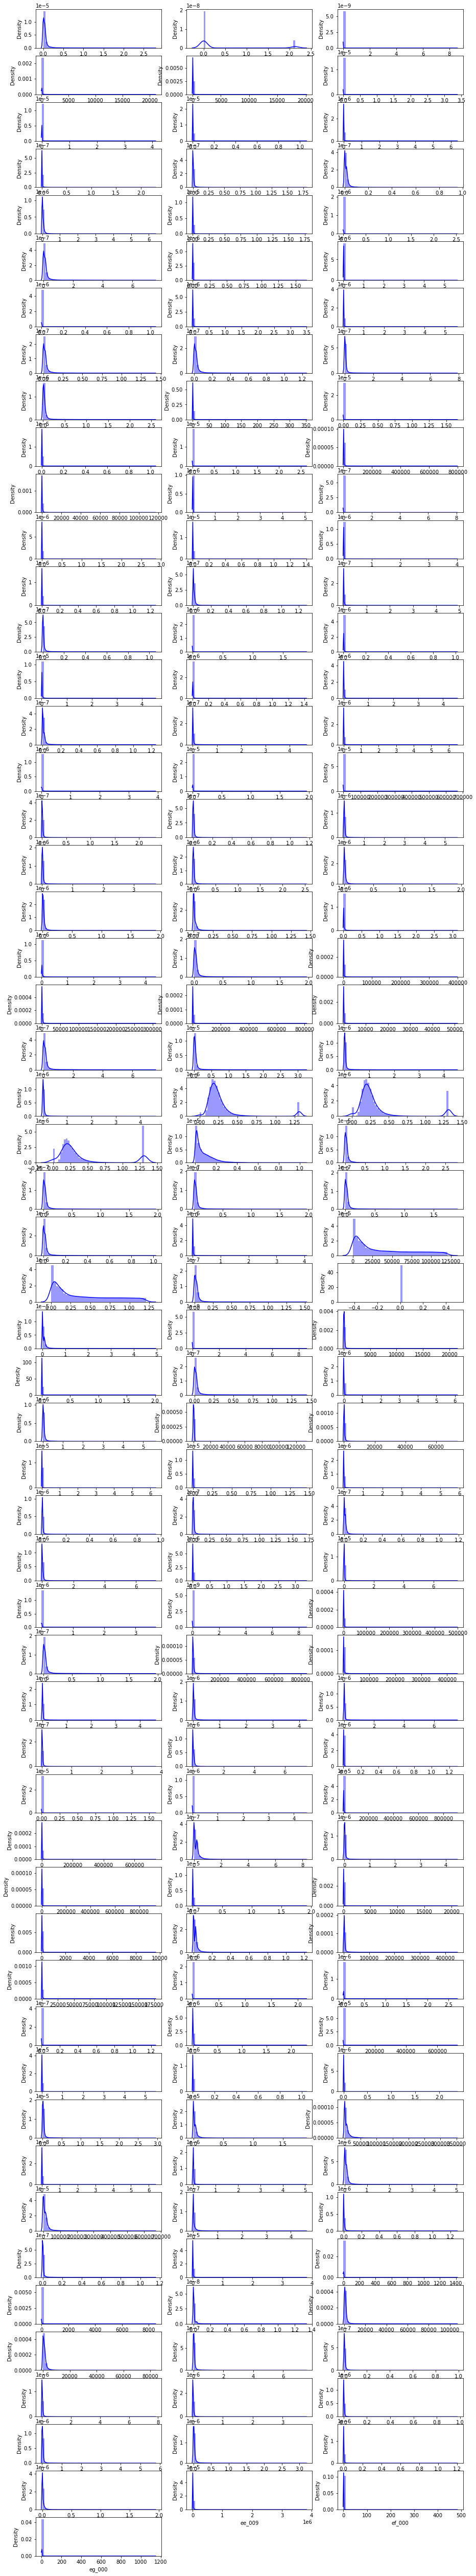

In [34]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

# plot distrubution of numeric features
plt.figure(figsize=(15, 100))
for i, feature in enumerate(numeric_features):
    plt.subplot(60, 3, i+1)
    sns.distplot(df[feature], color='blue')
    plt.xlabel(feature)
plt.show()

#### Observations:
- As per the above plots most of the feature are not normally distributed.
- Interpreting every column is not necessary as this is a sensor data.

### Handling Imbalanced Dataset


In [35]:
# Split the data into train and test
X = df.drop('class', axis=1)
y = df['class']

In [36]:
# encode the target variable
y = y.replace({'neg': 0, 'pos': 1})

In [17]:
models = {"Logistic Regression": LogisticRegression(), "Decision Tree": DecisionTreeClassifier(), "Random Forest": RandomForestClassifier(), "XGBoost": XGBClassifier(), "LightGBM": LGBMClassifier(), "AdaBoost": AdaBoostClassifier(), "Gradient Boosting": GradientBoostingClassifier(), "Support Vector Machine": SVC(), "K-Nearest Neighbors": KNeighborsClassifier(), "Gaussian Naive Bayes": GaussianNB(), "Linear Discriminant Analysis": LinearDiscriminantAnalysis(), "Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis()}

#### Impute using SimpleImputer with straegy as median

In [26]:
# # numeric features
# num_features = X.select_dtypes(exclude='object').columns

# fit the simple imputer with median strategy
simple_pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), ('scaler', RobustScaler())])

# transform the data
X_simple = simple_pipeline.fit_transform(X)

# resample the data using SMOTE
sm = SMOTETomek(random_state=42, sampling_strategy='minority', n_jobs=-1)

# fit the data
X_sm, y_sm = sm.fit_resample(X_simple, y)

# training the model
model_performance_median = model_evaluation(models, X_sm, y_sm)

# print the model performance
model_performance_median

,Model,Accuracy,F1 Score,Precision,Recall,ROC AUC,Cost
3,XGBoost,0.997451,0.997451,0.997456,0.997451,0.99747,6480
4,LightGBM,0.996644,0.996644,0.996654,0.996644,0.996672,7160
2,Random Forest,0.995412,0.995412,0.995426,0.995412,0.995445,12350
1,Decision Tree,0.990612,0.990612,0.990627,0.990612,0.990644,40920
8,K-Nearest Neighbors,0.974682,0.974682,0.975055,0.974682,0.974852,72110
6,Gradient Boosting,0.982838,0.982839,0.982887,0.982838,0.982898,74600
5,AdaBoost,0.974045,0.974046,0.974047,0.974045,0.97405,151640
11,Quadratic Discriminant Analysis,0.945967,0.945962,0.946003,0.945967,0.945896,352780
10,Linear Discriminant Analysis,0.937598,0.937484,0.939943,0.937598,0.937126,587500
0,Logistic Regression,0.622616,0.590847,0.684613,0.622616,0.626134,619020


#### Observation:
- XGBoost is performing better than other models.

### Impute using SimpleImputer with strategy as mean

In [27]:
# create a pipeline for imputing missing values with mean strategy
mean_pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')), ('scaler', RobustScaler())])

# transform the data
X_mean = mean_pipeline.fit_transform(X)

# resample the data using SMOTE
sm = SMOTETomek(random_state=42, sampling_strategy='minority', n_jobs=-1)

# fit the data
X_sm, y_sm = sm.fit_resample(X_mean, y)

# training the model
model_performance_mean = model_evaluation(models, X_sm, y_sm)

# print the model performance
model_performance_mean

,Model,Accuracy,F1 Score,Precision,Recall,ROC AUC,Cost
3,XGBoost,0.997623,0.997623,0.997627,0.997623,0.997647,5950
4,LightGBM,0.99601,0.99601,0.996019,0.99601,0.996045,11720
2,Random Forest,0.994651,0.994652,0.994665,0.994651,0.994694,17430
1,Decision Tree,0.990789,0.990789,0.990812,0.990789,0.990844,35980
8,K-Nearest Neighbors,0.980177,0.980178,0.980416,0.980177,0.980361,55630
6,Gradient Boosting,0.983742,0.983743,0.983777,0.983742,0.983809,73900
5,AdaBoost,0.975125,0.975125,0.975126,0.975125,0.975106,153350
11,Quadratic Discriminant Analysis,0.941251,0.941217,0.941722,0.941251,0.940941,450430
10,Linear Discriminant Analysis,0.940148,0.940052,0.941925,0.940148,0.939571,545750
0,Logistic Regression,0.698404,0.685462,0.743809,0.698404,0.701987,588000


#### Observation:
- Here as well XGBoost is performing better than other models.

### Impute using SimpleImputer with strategy as constant

In [20]:
# Removing a few models due to high cost
models = {"Logistic Regression": LogisticRegression(), "Decision Tree": DecisionTreeClassifier(), "Random Forest": RandomForestClassifier(), "XGBoost": XGBClassifier(), "AdaBoost": AdaBoostClassifier(), "Gradient Boosting": GradientBoostingClassifier(), "K-Nearest Neighbors": KNeighborsClassifier()}

In [30]:
# create a pipeline with strategy constant
constant_pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value=0)), ('scaler', RobustScaler())])

# transform the data
X_constant = constant_pipeline.fit_transform(X)

# resample the data using SMOTE
sm = SMOTETomek(random_state=42, sampling_strategy='minority', n_jobs=-1)

# fit the data
X_sm, y_sm = sm.fit_resample(X_constant, y)

# training the model
model_performance_const = model_evaluation(models, X_sm, y_sm)

# print the model performance
model_performance_const

,Model,Accuracy,F1 Score,Precision,Recall,ROC AUC,Cost
3,XGBoost,0.997791,0.997791,0.997797,0.997791,0.997808,3460
2,Random Forest,0.99486,0.99486,0.994885,0.99486,0.994896,10520
1,Decision Tree,0.989508,0.989508,0.989541,0.989508,0.989548,39710
6,K-Nearest Neighbors,0.975745,0.975744,0.976133,0.975745,0.975888,64020
5,Gradient Boosting,0.98114,0.981141,0.981165,0.98114,0.981174,93130
4,AdaBoost,0.973622,0.973622,0.973637,0.973622,0.973646,142920
0,Logistic Regression,0.619446,0.562468,0.760132,0.619446,0.623176,169460


#### Observations:
- Here as well XGBoost is performing better than other models.
- The cost of the XGBoost model with strategy as constant is the least so far.


### Impute using KNNImputer

In [31]:
# find the optimal n_neighbor for KNN
from sklearn.pipeline import Pipeline

imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
n = [str(i) for i in [1, 3, 5, 7, 9, 11]]
acc = []
for k in n:
    pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(k))), ('m', LogisticRegression())])
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=5, n_jobs=-1)
    acc.append(scores)
    print('n_neighbors=%s, Accuracy: %.3f (%.3f)' % (k, np.mean(scores), np.std(scores)))

n_neighbors=1, Accuracy: 0.989 (0.001)
n_neighbors=3, Accuracy: 0.989 (0.001)
n_neighbors=5, Accuracy: 0.989 (0.000)
n_neighbors=7, Accuracy: 0.989 (0.001)
n_neighbors=9, Accuracy: 0.989 (0.001)
n_neighbors=11, Accuracy: 0.989 (0.001)


#### Observations:
- n_neighbors = 5 seems to be performing better than other values of n_neighbors but the difference is negligible.

In [18]:
# create a pipeline with KNN imputer
knn_pipeline = Pipeline(steps=[('imputer', KNNImputer(n_neighbors=5)), ('scaler', RobustScaler())])

# transform the data
X_knn = knn_pipeline.fit_transform(X)

# resample the data using SMOTE
sm = SMOTETomek(random_state=42, sampling_strategy='minority', n_jobs=-1)

# fit the data
X_sm, y_sm = sm.fit_resample(X_knn, y)

# training the model
model_performance_knn = model_evaluation(models, X_sm, y_sm)

# print the model performance
model_performance_knn

,Model,Accuracy,F1 Score,Precision,Recall,ROC AUC,Cost
3,XGBoost,0.997368,0.997368,0.997377,0.997368,0.997404,4050
4,LightGBM,0.995458,0.995458,0.995481,0.995458,0.995517,7930
2,Random Forest,0.9941,0.9941,0.994129,0.9941,0.994166,13640
1,Decision Tree,0.989006,0.989006,0.989034,0.989006,0.989069,44730
8,K-Nearest Neighbors,0.978436,0.978438,0.978778,0.978436,0.978666,53590
6,Gradient Boosting,0.982384,0.982385,0.982463,0.982384,0.982491,69810
5,AdaBoost,0.97347,0.97347,0.973471,0.97347,0.973471,156190
11,Quadratic Discriminant Analysis,0.940615,0.940587,0.940954,0.940615,0.940335,440290
0,Logistic Regression,0.587486,0.537009,0.668709,0.587486,0.593479,514170
10,Linear Discriminant Analysis,0.938789,0.938673,0.940928,0.938789,0.938132,572040


#### Observations:
- Again XGBoost is the best performing model in terms of cost.

### Principal Component Analysis with imputed data

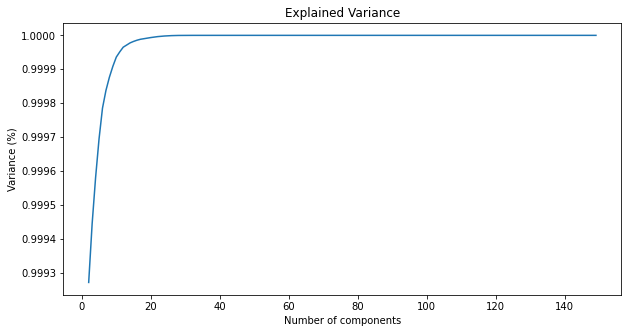

In [41]:
# create a pipeline with PCA
pca_pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value=0)), ('scaler', RobustScaler())])

# transform the data
X_pca = pca_pipeline.fit_transform(X)

# apply pca
var_ratio = {}
for i in range(2, 150):
    pca = PCA(n_components=i)
    df_pca = pca.fit(X_pca)
    var_ratio[i] = sum(df_pca.explained_variance_ratio_)

# plot the variance ratio
plt.figure(figsize=(10, 5))
plt.plot(list(var_ratio.keys()), list(var_ratio.values()))
plt.xlabel('Number of components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.show()

<Figure size 720x360 with 0 Axes>

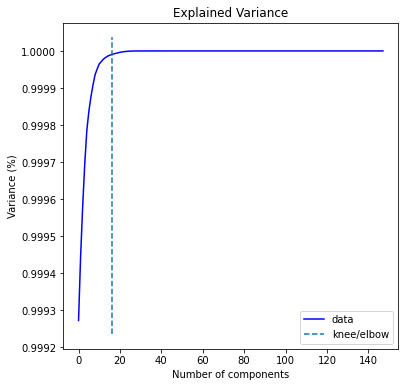

Optimal number of components: 18


In [43]:
# find the optimal number of components
l = np.arange(len(var_ratio))
variance_ration = list(var_ratio.values())
components = list(var_ratio.keys())
kl = KneeLocator(l, variance_ration, S=1, curve='concave', interp_method='polynomial')

# plot the variance ratio
plt.figure(figsize=(10, 5))
kl.plot_knee()
plt.xlabel('Number of components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.show()
k = components[kl.knee]
print('Optimal number of components: {}'.format(k))

In [44]:
# reducing the dimensionality
pca = PCA(n_components=18, random_state=42).fit(X_sm)
reduced_data = pca.fit_transform(X_pca)

In [45]:
# Resampling the data using SMOTE
sm = SMOTETomek(random_state=42, sampling_strategy='minority')

# fit the data
X_sm, y_sm = sm.fit_resample(reduced_data, y)

# training the model
model_performance_pca = model_evaluation(models, X_sm, y_sm)

# print the model performance
model_performance_pca

,Model,Accuracy,F1 Score,Precision,Recall,ROC AUC,Cost
2,Random Forest,0.986546,0.986547,0.986577,0.986546,0.986578,58040
3,XGBoost,0.980628,0.980629,0.980681,0.980628,0.98067,86380
1,Decision Tree,0.977308,0.977308,0.977327,0.977308,0.977332,118030
6,K-Nearest Neighbors,0.968154,0.968153,0.968419,0.968154,0.96825,123120
5,Gradient Boosting,0.938479,0.938475,0.938516,0.938479,0.938434,396650
4,AdaBoost,0.916425,0.916412,0.91655,0.916425,0.916344,552750
0,Logistic Regression,0.861844,0.860266,0.877412,0.861844,0.860982,1415230


#### Observations:
- Here Random forest seems to be performing better than other models.

## Final Observations:

In [ ]:
from prettytable import PrettyTable

# create a table
table = PrettyTable()
table.field_names = ['Model', 'Imuputation Method', 'Accuracy', 'Precision', 'Recall', 'ROC AUC', 'Cost']
table.add_row(['XGBoost', 'Median', 0.997, 0.997, 0.997, 0.997, '6480'])
table.add_row(['XGBoost', 'Mean', 0.997, 0.997, 0.997, 0.997, '5950'])
table.add_row(['XGBoost', 'Constant', 0.997, 0.997, 0.997, 0.997, '3460'])
table.add_row(['XGBoost', 'KNN', 0.997, 0.997, 0.997, 0.997, '4050'])
table.add_row(['Random Forest', 'PCA', 0.986, 0.986, 0.986, 0.986, '58040'])
print(table)

#### Observations:
- Overall XGBoost is the best performing model and with strategy as constant, the cost '3460' is the least of all.

## Model Building

In [50]:
# create a pipeline with strategy constant
constant_pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value=0)), ('scaler', RobustScaler())])

# transform the data
X_constant = constant_pipeline.fit_transform(X)

In [51]:
final_model = XGBClassifier(random_state=42, n_jobs=-1)

# resample the data using SMOTE
sm = SMOTETomek(random_state=42, sampling_strategy='minority')

# fit the data
X_sm, y_sm = sm.fit_resample(X_constant, y)

In [52]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

# fit the model
final_mode = final_model.fit(X_train, y_train)

# predict the test data
y_pred = final_model.predict(X_test)

# print the cost of the model
print("Cost of the model: {}".format(cost(y_test, y_pred)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11892
           1       1.00      1.00      1.00     11650

    accuracy                           1.00     23542
   macro avg       1.00      1.00      1.00     23542
weighted avg       1.00      1.00      1.00     23542

[[11846    46]
 [    6 11644]]
0.997791181717781
0.9978084159437802
0.9977720651242502
0.9960650128314799
0.9994849785407726
0.9971284481786145
Cost of the model: 3460


### The Cost of XGBoost model with strategy as constant is <font color='red'>"3460"</font>